In [12]:
"""
Created on 05/01/2023
Group 2
Authors: S.V.
License: this code is released under the CeCILL 2.1 license. See
https://www.cecill.info/licenses/Licence_CeCILL_V2.1-en.txt
"""

'\nCreated on 05/01/2023\nGroup 2\nAuthors: S.V.\nLicense: this code is released under the CeCILL 2.1 license. See\nhttps://www.cecill.info/licenses/Licence_CeCILL_V2.1-en.txt\n'

In [47]:
import os
import sys
import math
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [48]:
data = pd.read_csv("data_v2.csv", )

# deleting useless variables
data = data.drop(['Unnamed: 0', 'target', 'distance', 'seqnum', 'loc_initiator_z', 'loc_target_z', 'protocol', 'ranging_unit', 'initiator', 'register_dump_CIR'], axis=1)
data

,nlos_indicator,t1,t2,t3,t4,skew,tof,tof_skew,range,range_skew,...,loc_target_y,course_dist,temperature_initiator,temperature_target,timestamp,rssi_request,rssi_ack,rssi_data,rssi_mean,orientation
0,2.783982,946218857614,946490292658,946594234510,946322802711,-2.368804,1622,1745.608935,7.607739,8.187508,...,7.931,0.000000,30.980000,30.220001,1654929794228,-80.136574,-80.077130,-79.836296,-80.016667,270.0
1,2.920485,1009474709646,1009746235572,1009850439822,1009578917162,-1.045965,1633,1687.497019,7.659333,7.914943,...,7.931,0.000000,30.980000,29.840002,1654929795219,-80.267769,-79.988684,-79.835720,-80.030724,270.0
2,2.536090,1072923068046,1073194681670,1073299179662,1073027569304,-0.799856,1633,1674.791667,7.659333,7.855350,...,7.931,0.000000,30.980000,29.840002,1654929796210,-79.964310,-79.850138,-79.693502,-79.835983,270.0
3,2.857669,36731534990,37003232943,37107270798,36835576116,-0.984438,1635,1686.709409,7.668714,7.911249,...,7.931,0.000000,30.980000,29.840002,1654929797201,-80.040833,-79.818313,-79.849525,-79.902890,270.0
4,2.263103,99923195534,100194974620,100298828942,100027053147,-0.769092,1645,1685.436774,7.715617,7.905280,...,7.931,0.000000,30.980000,29.840002,1654929798190,-79.999908,-80.102552,-80.022316,-80.041592,270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,3.075243,301428484750,302000434919,302102988430,301531040251,-9.382925,995,1476.125937,4.666893,6.923540,...,2.793,6.999961,41.810001,46.939999,1654930833773,-80.229179,-79.428015,-79.342829,-79.666674,119.0
3942,3.085177,375355600014,375928251294,376031194254,375458544956,-8.306196,991,1418.532184,4.648132,6.653405,...,2.793,6.999961,41.525002,47.319996,1654930834930,-80.196487,-79.576395,-79.985511,-79.919464,119.0
3943,2.674524,449294310542,449867663034,449970544782,449397194279,-8.952233,994,1455.010695,4.662203,6.824502,...,2.793,6.999961,41.810001,46.939999,1654930836088,-80.158638,-79.435472,-79.234453,-79.609521,119.0
3944,2.727551,523279420046,523853474064,523955982478,523381930458,-8.490778,999,1434.188082,4.685655,6.726837,...,2.793,6.999961,41.240002,46.559998,1654930837246,-80.229492,-79.554364,-79.599858,-79.794571,119.0


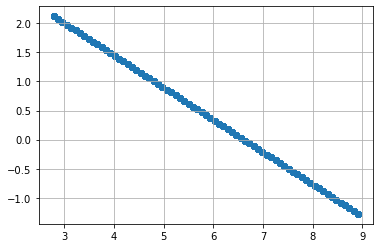

a =  -0.5548735684921144  et b =  3.6697196927161606
loc_iniatiator_y =  -0.5548735684921144  * loc_initiator_x +  3.6697196927161606


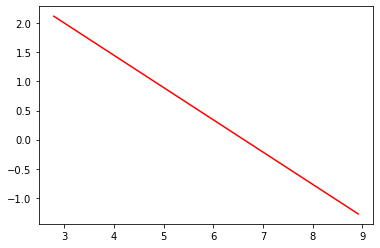

In [49]:
# Linear Regression to have x as a function of y of the form x=a*y+b
# with x : loc_initiator_y and y : loc_initiator_x
# a= -0.5548 et b= 3.6679

from scipy import stats

def predict(y):
    return slope * y + intercept

X =  data.loc_initiator_y
Y =  data.loc_initiator_x

axes = plt.axes()
axes.grid()
plt.scatter(X,Y)
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

fitLine = predict(X)
plt.plot(X, fitLine, c='r')

print("a = ", slope, " et b = ", intercept)
print("loc_iniatiator_y = ", slope, " * loc_initiator_x + ", intercept)

# Linear regression

In [52]:
X = data.drop(['loc_initiator_y', 'loc_initiator_x'], axis=1)
y = data.loc_initiator_y

# train base and test base
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3156, 22)
(790, 22)
(3156,)
(790,)


In [53]:
# model training
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [54]:
# Evaluation of the training set
from sklearn.metrics import r2_score
y_train_predict = linear_model.predict(X_train)
rmse_train = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2_train = r2_score(y_train, y_train_predict)
 
print("Model performance based on training set : ")
print("--------------------------------------")
print("The mean squared error is {}".format(rmse_train))
print("The R-squared is {}".format(r2_train))
print("\n")
 
# model evaluation for testing set
y_test_predict = linear_model.predict(X_test)
rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2_test = r2_score(y_test, y_test_predict)
 
print("Model performance based on testing set : ")
print("--------------------------------------")
print("The mean squared error is {}".format(rmse_test))
print("The R-squared is {}".format(r2_test))


Model performance based on training set : 
--------------------------------------
The mean squared error is 0.0001597630491868412
The R-squared is 0.9999999918225138


Model performance based on testing set : 
--------------------------------------
The mean squared error is 0.00016783871690380709
The R-squared is 0.9999999912369404


In [38]:
a = linear_model.coef_
b = linear_model.intercept_

In [39]:
a

array([ 5.70206931e-07, -7.50675143e-06,  7.50672576e-06, -7.50672577e-06,
        7.50675144e-06, -4.21201931e-04, -6.91669598e-06, -8.07808803e-06,
       -4.92867253e-07, -1.30128888e-07, -2.75993217e-05,  3.87703844e-06,
       -1.47446958e-05,  8.74493676e-01,  1.05651852e-05, -9.69554682e-06,
       -5.63766417e-10,  1.02293367e-06,  1.30723774e-06, -4.00554461e-06,
       -5.58457723e-07,  2.49567667e-07])

The MSE is approximatly equal to 0 and the R-squared approximatly 1, this means that the difference between what we predict and what we have is very small.

### Graphics

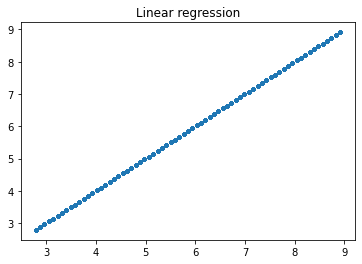

In [55]:
plt.plot(y, linear_model.predict(X),'.')
plt.title("Linear regression")
plt.show()

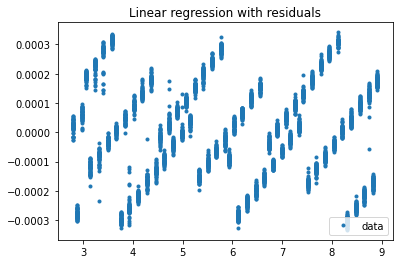

In [58]:
plt.plot(y, y-linear_model.predict(X), '.', label="data")
#plt.plot(X, a * X + b, "r-", label="regression")
plt.title("Linear regression with residuals")
plt.legend(loc="lower right")
plt.show()

## With only features

In [61]:
X = data[['nlos_indicator', 't1', 't2', 't3', 't4', 'skew', 'tof', 'tof_skew', 'loc_target_x', 'loc_target_y', 'rssi_request', 'rssi_ack', 'rssi_data', 'rssi_mean']]
y = data.loc_initiator_y

# train base and test base
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3156, 14)
(790, 14)
(3156,)
(790,)


In [62]:
# model training
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [63]:
# Evaluation of the training set
from sklearn.metrics import r2_score
y_train_predict = linear_model.predict(X_train)
rmse_train = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2_train = r2_score(y_train, y_train_predict)
 
print("Model performance based on training set : ")
print("--------------------------------------")
print("The mean squared error is {}".format(rmse_train))
print("The R-squared is {}".format(r2_train))
print("\n")
 
# model evaluation for testing set
y_test_predict = linear_model.predict(X_test)
rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2_test = r2_score(y_test, y_test_predict)
 
print("Model performance based on testing set : ")
print("--------------------------------------")
print("The mean squared error is {}".format(rmse_test))
print("The R-squared is {}".format(r2_test))


Model performance based on training set : 
--------------------------------------
The mean squared error is 1.4393399858019735
The R-squared is 0.3362662209838744


Model performance based on testing set : 
--------------------------------------
The mean squared error is 1.435676906594996
The R-squared is 0.3588127254129654


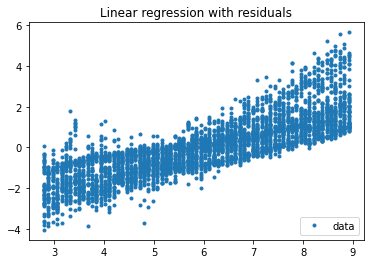

In [78]:
a = linear_model.coef_
b = linear_model.intercept_
plt.plot(y, y-linear_model.predict(X), '.', label="data")
#plt.plot(X, a * X + b, "r-", label="regression")
plt.title("Linear regression with residuals")
plt.legend(loc="lower right")
plt.show()